# Análisis Casos COVID-19 en Colombia

In [1]:
#Cargar los módulos más comunes con sus alias
import numpy as pd
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Descargar el CSV desde datos.gov.co localmente
!wget -O covid.csv 'https://www.datos.gov.co/resource/gt2j-8ykr.csv?$limit=1000'

In [66]:
!wget -O covid.csv https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD

--2021-06-23 01:09:19--  https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD
Resolving www.datos.gov.co (www.datos.gov.co)... 52.206.140.205
Connecting to www.datos.gov.co (www.datos.gov.co)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘covid.csv’

covid.csv               [               <=>  ] 652.32M  6.42MB/s    in 98s     

2021-06-23 01:10:57 (6.65 MB/s) - ‘covid.csv’ saved [684003027]



In [67]:
# Cargar el CSV desde datos.gov.co en un dataframe
covid = pd.read_csv('covid.csv')

/home/ubuntu/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (14,17,19,20,22) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [68]:
# Revisar el dataframe
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3968405 entries, 0 to 3968404
Data columns (total 23 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   fecha reporte web             object 
 1   ID de caso                    int64  
 2   Fecha de notificación         object 
 3   Código DIVIPOLA departamento  int64  
 4   Nombre departamento           object 
 5   Código DIVIPOLA municipio     int64  
 6   Nombre municipio              object 
 7   Edad                          int64  
 8   Unidad de medida de edad      int64  
 9   Sexo                          object 
 10  Tipo de contagio              object 
 11  Ubicación del caso            object 
 12  Estado                        object 
 13  Código ISO del país           float64
 14  Nombre del país               object 
 15  Recuperado                    object 
 16  Fecha de inicio de síntomas   object 
 17  Fecha de muerte               object 
 18  Fecha de diagnóstico  

In [69]:
#Para conocer los nombres de las columnas
covid.columns

Index(['fecha reporte web', 'ID de caso', 'Fecha de notificación',
       'Código DIVIPOLA departamento', 'Nombre departamento',
       'Código DIVIPOLA municipio', 'Nombre municipio', 'Edad',
       'Unidad de medida de edad', 'Sexo', 'Tipo de contagio',
       'Ubicación del caso', 'Estado', 'Código ISO del país',
       'Nombre del país', 'Recuperado', 'Fecha de inicio de síntomas',
       'Fecha de muerte', 'Fecha de diagnóstico', 'Fecha de recuperación',
       'Tipo de recuperación', 'Pertenencia étnica',
       'Nombre del grupo étnico'],
      dtype='object')

In [70]:
# Forma de los datos
covid.shape

(3968405, 23)

In [71]:
#Primeros datos
covid.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,6/3/2020 0:00:00,1,2/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,19,1,F,...,380.0,ITALIA,Recuperado,27/2/2020 0:00:00,NaN,6/3/2020 0:00:00,13/3/2020 0:00:00,PCR,6.0,NaN
1,9/3/2020 0:00:00,2,6/3/2020 0:00:00,76,VALLE,76111,BUGA,34,1,M,...,724.0,ESPAÑA,Recuperado,4/3/2020 0:00:00,NaN,9/3/2020 0:00:00,19/3/2020 0:00:00,PCR,5.0,NaN
2,9/3/2020 0:00:00,3,7/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,50,1,F,...,724.0,ESPAÑA,Recuperado,29/2/2020 0:00:00,NaN,9/3/2020 0:00:00,15/3/2020 0:00:00,PCR,6.0,NaN
3,11/3/2020 0:00:00,4,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,55,1,M,...,NaN,NaN,Recuperado,6/3/2020 0:00:00,NaN,11/3/2020 0:00:00,26/3/2020 0:00:00,PCR,6.0,NaN
4,11/3/2020 0:00:00,5,9/3/2020 0:00:00,5,ANTIOQUIA,5001,MEDELLIN,25,1,M,...,NaN,NaN,Recuperado,8/3/2020 0:00:00,NaN,11/3/2020 0:00:00,23/3/2020 0:00:00,PCR,6.0,NaN


In [72]:
# Últimos datos
covid.tail()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
3968400,21/6/2021 0:00:00,3968441,17/6/2021 0:00:00,8001,BARRANQUILLA,8001,BARRANQUILLA,14,1,F,...,NaN,NaN,Activo,13/6/2021 0:00:00,NaN,17/6/2021 0:00:00,NaN,NaN,NaN,NaN
3968401,21/6/2021 0:00:00,3968442,18/6/2021 0:00:00,8001,BARRANQUILLA,8001,BARRANQUILLA,44,1,M,...,NaN,NaN,Activo,14/6/2021 0:00:00,NaN,18/6/2021 0:00:00,NaN,NaN,NaN,NaN
3968402,21/6/2021 0:00:00,3968443,18/6/2021 0:00:00,8001,BARRANQUILLA,8001,BARRANQUILLA,21,1,M,...,NaN,NaN,Activo,14/6/2021 0:00:00,NaN,18/6/2021 0:00:00,NaN,NaN,NaN,NaN
3968403,21/6/2021 0:00:00,3968444,18/6/2021 0:00:00,8001,BARRANQUILLA,8001,BARRANQUILLA,28,1,M,...,NaN,NaN,Activo,14/6/2021 0:00:00,NaN,18/6/2021 0:00:00,NaN,NaN,NaN,NaN
3968404,21/6/2021 0:00:00,3968445,17/6/2021 0:00:00,8001,BARRANQUILLA,8001,BARRANQUILLA,43,1,F,...,NaN,NaN,Activo,13/6/2021 0:00:00,NaN,17/6/2021 0:00:00,NaN,NaN,NaN,NaN


In [106]:
#Resumenes estadísticos
covid['Edad'].describe()

count    3.968405e+06
mean     3.993805e+01
std      1.798049e+01
min      1.000000e+00
25%      2.700000e+01
50%      3.800000e+01
75%      5.200000e+01
max      1.140000e+02
Name: Edad, dtype: float64

In [111]:
#Seleccionar solo algunas columnas de interés
covid[['Nombre municipio', 'Sexo', 'Edad']]

,Nombre municipio,Sexo,Edad
0,BOGOTA,F,19
1,BUGA,M,34
2,MEDELLIN,F,50
3,MEDELLIN,M,55
4,MEDELLIN,M,25
...,...,...,...
3968400,BARRANQUILLA,F,14
3968401,BARRANQUILLA,M,44
3968402,BARRANQUILLA,M,21
3968403,BARRANQUILLA,M,28


In [113]:
# Ordenar por dos columnas
covid.sort_values(by=['Nombre municipio', 'Edad'], ascending=True)

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,...,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
1187033,2020-11-14,1187074,2020-11-12,5,ANTIOQUIA,5002,ABEJORRAL,1,2,F,...,NaN,NaN,Recuperado,2020-11-05,NaT,2020-11-11,2021-02-12,Tiempo,6.0,NaN
2356926,2021-03-25,2356967,2021-03-18,5,ANTIOQUIA,5002,ABEJORRAL,1,2,F,...,NaN,NaN,Recuperado,2021-03-16,NaT,2021-03-24,2021-05-27,Tiempo,6.0,NaN
1027748,2020-10-27,1027789,2020-10-15,5,ANTIOQUIA,5002,ABEJORRAL,4,2,M,...,NaN,NaN,Recuperado,2020-10-11,NaT,2020-10-26,2020-10-28,Tiempo,6.0,NaN
446515,2020-08-15,446556,2020-08-28,5,ANTIOQUIA,5002,ABEJORRAL,7,1,F,...,NaN,NaN,Recuperado,2020-08-24,NaT,NaT,2020-09-14,Tiempo,6.0,NaN
1298920,2020-11-28,1298961,2020-11-14,5,ANTIOQUIA,5002,ABEJORRAL,7,1,F,...,NaN,NaN,Recuperado,2020-11-10,NaT,2020-11-25,2020-11-29,Tiempo,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975463,2021-01-22,1975504,2021-01-15,47,MAGDALENA,47980,ZONA BANANERA,89,1,M,...,NaN,NaN,Recuperado,2021-01-11,NaT,2021-01-21,2021-01-28,Tiempo,6.0,NaN
1264405,2020-11-25,1264446,2020-11-20,47,MAGDALENA,47980,ZONA BANANERA,90,1,F,...,NaN,NaN,Recuperado,2020-11-17,NaT,2020-11-19,2021-01-24,Tiempo,6.0,NaN
400280,2020-08-11,400321,2020-08-02,47,MAGDALENA,47980,ZONA BANANERA,93,1,M,...,NaN,NaN,Fallecido,2020-07-24,2020-08-02,2020-08-11,NaT,NaN,6.0,NaN
2026462,2021-01-25,2026503,2021-01-10,68,SANTANDER,68081,barrancabermeja,76,1,F,...,NaN,NaN,Fallecido,2021-01-05,2021-02-23,2021-01-21,NaT,NaN,6.0,NaN


In [114]:
# ¿Cuántas personas con sus edades, hay infectadas por municipio?
c2 = covid[['Nombre municipio', 'Sexo', 'Edad']]
c2.sort_values(by=['Sexo', 'Edad'], ascending=False)

,Nombre municipio,Sexo,Edad
2175761,BOGOTA,m,70
3688741,BOGOTA,m,61
3508895,BOGOTA,m,41
3683944,BOGOTA,m,40
3516906,BOGOTA,m,28
...,...,...,...
3966156,CARTAGENA,F,1
3967103,POPAYAN,F,1
3968297,BARRANQUILLA,F,1
3968304,BARRANQUILLA,F,1


In [115]:
#"groupby" para ordenar
# ¿Cuántos y sus edades?
c2.groupby(['Nombre municipio'])['Edad'].describe()

,count,mean,std,min,25%,50%,75%,max
Nombre municipio,,,,,,,,
ABEJORRAL,351.0,44.977208,20.213278,1.0,30.0,42.0,62.0,93.0
ABREGO,386.0,44.487047,17.967824,1.0,31.0,43.0,58.0,91.0
ABRIAQUI,43.0,39.744186,18.038442,16.0,26.0,34.0,50.5,86.0
ACACIAS,5358.0,40.865062,16.188648,1.0,29.0,39.0,51.0,95.0
ACANDI,402.0,42.472637,19.304374,1.0,29.0,40.0,56.0,96.0
...,...,...,...,...,...,...,...,...
ZIPACON,168.0,41.119048,18.234274,2.0,26.0,40.5,52.0,87.0
ZIPAQUIRA,16345.0,38.694830,17.089457,1.0,26.0,37.0,50.0,103.0
ZONA BANANERA,903.0,40.230343,19.496207,1.0,26.5,38.0,54.0,93.0


In [116]:
# Cuántos y sus edades
c2.groupby(['Nombre municipio'])['Sexo'].describe()

,count,unique,top,freq
Nombre municipio,,,,
ABEJORRAL,351,2,F,197
ABREGO,386,2,F,212
ABRIAQUI,43,2,M,24
ACACIAS,5358,2,M,3200
ACANDI,402,2,F,231
...,...,...,...,...
ZIPACON,168,2,F,99
ZIPAQUIRA,16345,2,F,8667
ZONA BANANERA,903,2,M,482


In [117]:
cd = covid.groupby(['Nombre departamento'])[['Edad']].describe()
cd

Edad                                                \
                         count       mean        std   min   25%   50%   75%   
Nombre departamento                                                            
AMAZONAS                6376.0  37.819166  18.501004   1.0  23.0  36.0  51.0   
ANTIOQUIA             610130.0  39.635889  17.500334   1.0  27.0  37.0  52.0   
ARAUCA                  9553.0  38.541087  16.958906   1.0  27.0  36.0  49.0   
ATLANTICO             104401.0  39.578328  18.964467   1.0  26.0  38.0  53.0   
BARRANQUILLA          180636.0  40.407344  18.945915   1.0  27.0  38.0  54.0   
BOGOTA               1165221.0  38.993262  17.685757   1.0  26.0  37.0  51.0   
BOLIVAR                24618.0  40.294216  19.427231   1.0  26.0  38.0  54.0   
BOYACA                 82016.0  40.303977  17.946604   1.0  27.0  38.0  53.0   
CALDAS                 83826.0  41.772887  18.649237   1.0  27.0  40.0  55.0   
CAQUETA                19585.0  40.068981  18.184455   1.0  27.0  37.0  52.0   
CARTAGENA              98863.0  39.084460  17.708330   1.0  27.0  37.0  51.0   
CASANARE               26703.0  37.267535  15.662185   1.0  26.0  35.0  47.0   
CAUCA                  38548.0  41.532972  18.265736   1.0  28.0  39.0  54.0   
CESAR                  76945.0  38.878472  18.158659   1.0  26.0  37.0  51.0   
CHOCO                  13505.0  39.003258  18.173682   1.0  26.0  37.0  51.0   
CORDOBA                74363.0  41.845622  19.308811   1.0  27.0  40.0  56.0   
CUNDINAMARCA          204717.0  39.335277  17.585310   1.0  27.0  37.0  51.0   
Caldas                     1.0  89.000000        NaN  89.0  89.0  89.0  89.0   
GUAINIA                 1993.0  35.271450  15.383618   1.0  25.0  32.0  44.0   
GUAJIRA                38548.0  38.704057  18.532034   1.0  26.0  37.0  51.0   
GUAVIARE                4031.0  37.156289  16.229538   1.0  26.0  35.0  46.0   
HUILA                  67017.0  40.666607  17.916136   1.0  27.0  38.0  53.0   
MAGDALENA              22571.0  41.410350  19.982533   1.0  26.0  40.0  56.0   
META                   65207.0  38.754490  16.595774   1.0  27.0  36.0  49.0   
NARIÑO                 73092.0  41.355853  17.682121   1.0  28.0  39.0  53.0   
NORTE SANTANDER        70270.0  41.135819  17.484210   1.0  28.0  39.0  53.0   
PUTUMAYO               13109.0  39.401251  17.312013   1.0  27.0  37.0  50.0   
QUINDIO                47227.0  42.566794  18.836576   1.0  28.0  40.0  56.0   
RISARALDA              71037.0  41.240325  17.934007   1.0  28.0  38.0  54.0   
SAN ANDRES              6166.0  40.811385  17.282518   1.0  27.0  39.0  54.0   
SANTANDER             174145.0  40.917833  17.837974   1.0  28.0  39.0  53.0   
STA MARTA D.E.         54554.0  39.689702  18.275234   1.0  27.0  38.0  52.0   
SUCRE                  44322.0  41.018253  19.231734   1.0  27.0  39.0  55.0   
TOLIMA                 85216.0  41.507628  18.623997   1.0  28.0  39.0  55.0   
Tolima                     1.0  54.000000        NaN  54.0  54.0  54.0  54.0   
VALLE                 305921.0  41.809297  18.383453   1.0  28.0  39.0  55.0   
VAUPES                  1660.0  38.522892  15.834019   1.0  27.0  36.0  49.0   
VICHADA                 2311.0  36.114236  15.166205   1.0  25.0  33.0  44.0   

                            
                       max  
Nombre departamento         
AMAZONAS              97.0  
ANTIOQUIA            110.0  
ARAUCA                99.0  
ATLANTICO            104.0  
BARRANQUILLA         113.0  
BOGOTA               114.0  
BOLIVAR              107.0  
BOYACA               109.0  
CALDAS               105.0  
CAQUETA              105.0  
CARTAGENA            107.0  
CASANARE              99.0  
CAUCA                107.0  
CESAR                104.0  
CHOCO                102.0  
CORDOBA              106.0  
CUNDINAMARCA         112.0  
Caldas                89.0  
GUAINIA               88.0  
GUAJIRA              105.0  
GUAVIARE              99.0  
HUILA                104.0  
MAGDALENA           

In [80]:
cd.shape

(27, 8)

In [81]:
cd['count']
#cd['min'] #se puede sacar el mínimo
#cd['max'] #se puede sacar el máximo

departamento_nom
ANTIOQUIA          106.0
ATLANTICO            4.0
BARRANQUILLA        31.0
BOGOTA             401.0
BOLIVAR              3.0
BOYACA               6.0
CALDAS              15.0
CARTAGENA           39.0
CASANARE             2.0
CAUCA               12.0
CESAR               16.0
CORDOBA              2.0
CUNDINAMARCA        49.0
GUAJIRA              1.0
HUILA               30.0
MAGDALENA            1.0
META                12.0
NARIÑO               6.0
NORTE SANTANDER     19.0
QUINDIO             23.0
RISARALDA           34.0
SAN ANDRES           2.0
SANTANDER           12.0
STA MARTA D.E.      11.0
SUCRE                1.0
TOLIMA              14.0
VALLE              148.0
Name: count, dtype: float64

In [82]:
cd.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [118]:
cd.columns = cd.columns.droplevel(0)

In [84]:
cd.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [85]:
cd['count']

departamento_nom
ANTIOQUIA          106.0
ATLANTICO            4.0
BARRANQUILLA        31.0
BOGOTA             401.0
BOLIVAR              3.0
BOYACA               6.0
CALDAS              15.0
CARTAGENA           39.0
CASANARE             2.0
CAUCA               12.0
CESAR               16.0
CORDOBA              2.0
CUNDINAMARCA        49.0
GUAJIRA              1.0
HUILA               30.0
MAGDALENA            1.0
META                12.0
NARIÑO               6.0
NORTE SANTANDER     19.0
QUINDIO             23.0
RISARALDA           34.0
SAN ANDRES           2.0
SANTANDER           12.0
STA MARTA D.E.      11.0
SUCRE                1.0
TOLIMA              14.0
VALLE              148.0
Name: count, dtype: float64

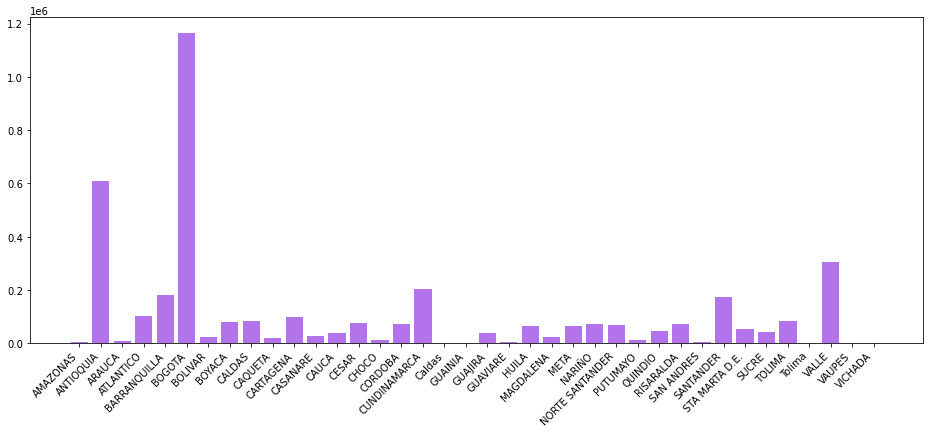

In [119]:
# Graficar la cantidad de casos por departamento
fig, ax = plt.subplots(figsize=(16,6))
ax.bar(x=cd.index, height=cd['count'], color='blueviolet', alpha=0.66)
# Para cambiar, tipo de fuente, color, entre otros
# https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text
plt.xticks(rotation=45, ha='right')
plt.show()

In [120]:
cd.columns

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

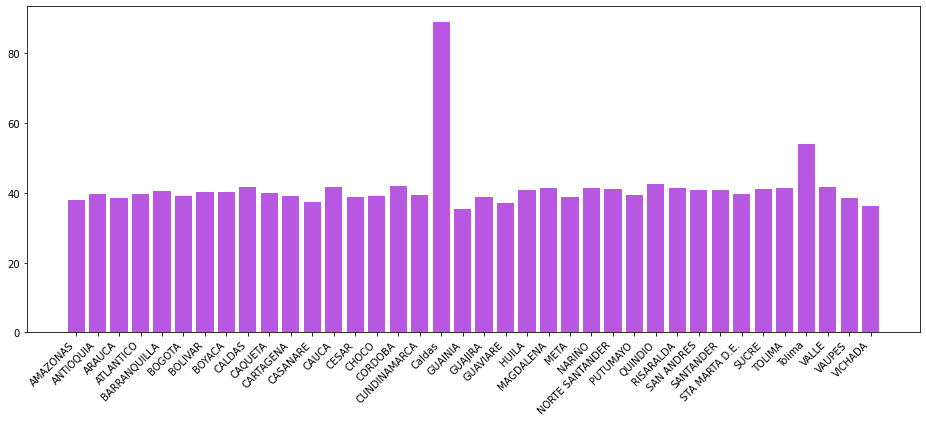

In [121]:
# Promedio de edad por departamento
fig, ax = plt.subplots(figsize=(16,6))
ax.bar(x=cd.index, height=cd['mean'], color='darkviolet', alpha=0.66)
plt.xticks(rotation=45, ha='right')
plt.show()

In [122]:
covid.columns

Index(['fecha reporte web', 'ID de caso', 'Fecha de notificación',
       'Código DIVIPOLA departamento', 'Nombre departamento',
       'Código DIVIPOLA municipio', 'Nombre municipio', 'Edad',
       'Unidad de medida de edad', 'Sexo', 'Tipo de contagio',
       'Ubicación del caso', 'Estado', 'Código ISO del país',
       'Nombre del país', 'Recuperado', 'Fecha de inicio de síntomas',
       'Fecha de muerte', 'Fecha de diagnóstico', 'Fecha de recuperación',
       'Tipo de recuperación', 'Pertenencia étnica',
       'Nombre del grupo étnico'],
      dtype='object')

In [123]:
for fecha in ['fecha reporte web','Fecha de notificación','Fecha de inicio de síntomas','Fecha de muerte', 'Fecha de diagnóstico', 'Fecha de recuperación']:
    covid[fecha]= pd.to_datetime(covid[fecha],format='%d/%m/%Y %H:%M:%S')

In [124]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3968405 entries, 0 to 3968404
Data columns (total 23 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   fecha reporte web             datetime64[ns]
 1   ID de caso                    int64         
 2   Fecha de notificación         datetime64[ns]
 3   Código DIVIPOLA departamento  int64         
 4   Nombre departamento           object        
 5   Código DIVIPOLA municipio     int64         
 6   Nombre municipio              object        
 7   Edad                          int64         
 8   Unidad de medida de edad      int64         
 9   Sexo                          object        
 10  Tipo de contagio              object        
 11  Ubicación del caso            object        
 12  Estado                        object        
 13  Código ISO del país           float64       
 14  Nombre del país               object        
 15  Recuperado                    ob

In [125]:
#Casos por cada día
cf = covid.groupby(['Fecha de diagnóstico'])[['Edad']].describe()
cf.columns = cf.columns.droplevel(0)
cf

,count,mean,std,min,25%,50%,75%,max
Fecha de diagnóstico,,,,,,,,
2020-03-06,1.0,19.000000,NaN,19.0,19.0,19.0,19.00,19.0
2020-03-09,2.0,42.000000,11.313708,34.0,38.0,42.0,46.00,50.0
2020-03-11,6.0,40.333333,24.945273,22.0,25.5,27.5,48.25,85.0
2020-03-12,4.0,55.000000,18.797163,36.0,40.5,55.0,69.50,74.0
2020-03-13,5.0,50.600000,13.685759,30.0,48.0,49.0,61.00,65.0
...,...,...,...,...,...,...,...,...
2021-06-17,25635.0,38.632612,17.031727,1.0,26.0,37.0,50.00,111.0
2021-06-18,19212.0,37.885540,16.771974,1.0,26.0,36.0,49.00,101.0
2021-06-19,14788.0,37.989654,17.012030,1.0,26.0,36.0,50.00,100.0


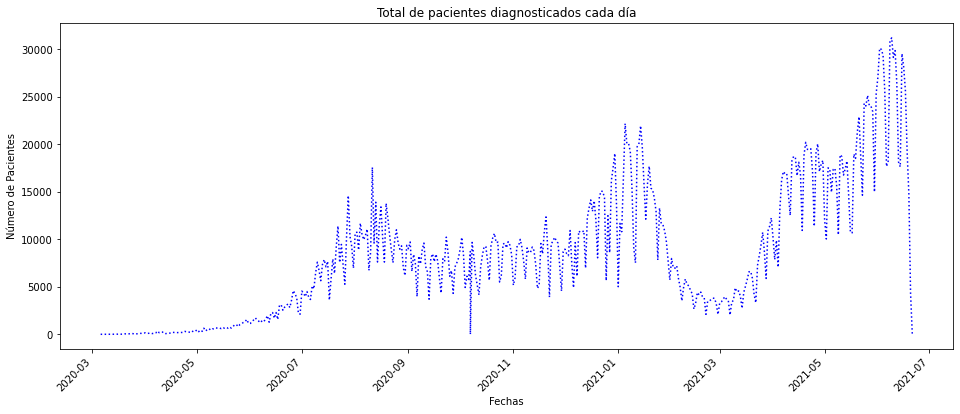

In [126]:
# Total de pacientes diagnosticados cada día
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(cf.index, cf['count'], 'b:')
ax.set(title='Total de pacientes diagnosticados cada día', xlabel='Fechas', ylabel='Número de Pacientes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [127]:
cf['acumulados'] = cf['count'].cumsum()

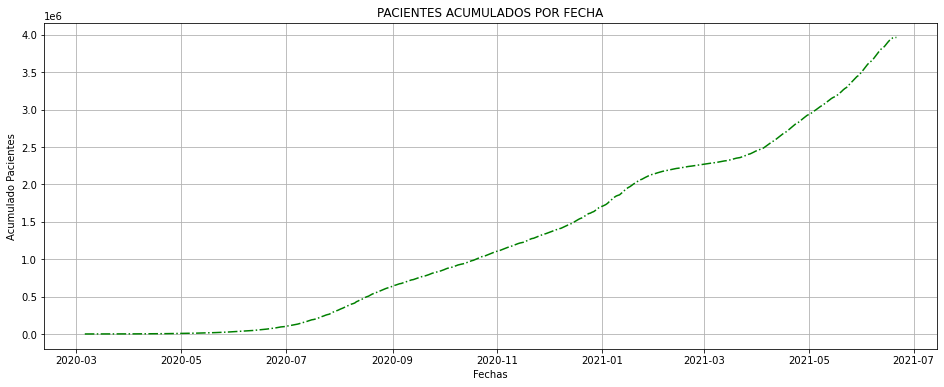

In [128]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(cf.index, cf['acumulados'], 'g-.')
ax.set(title='PACIENTES ACUMULADOS POR FECHA', xlabel='Fechas', ylabel='Acumulado Pacientes')
#plt.xticks(rotation=45, ha='right')
ax.grid()
plt.show()